## Data Preprocessing 2
### 데이터 전처리 실습
### 1️⃣ Feature scaling

두 변수 중 하나의 값의 크기가 너무 클 경우  
ex) 몸무게와 키가 변수일 때 키가 영향을 많이 받음

=> Feature 간의 최대-최소값의 차이를 맞춘다.  
<br/>  

1. Feature scaling 전략  
- Min-Max Normalization  
기존 변수에 범위를 `새로운 최대-최소로 변경`  
일반적으로 `0과 1사이 값으로 변경`

- Standardization(Z-score normalization)  
기존 변수에 범위를 정규 분포로 변환  
`실제 Min-Max의 값을 모를 때 활용가능`

✔ 주의 사항  
실제 사용할 때는 반드시   
`정규화 Parameter(최대/최소, 평균/표준편차)`등을  
`기억하여 새로운 값에 적용`  
(실제 서비스 상에서 필요)  
<br/>

### Min-Max Normalization
x_i_norm = ((x_i - x_min) / (x_max - x_min)) * (new_max - new_low) + new_low

```
(df['A'] - df['A'].min())/(df['A'].max() - df['A'].min()) * (5-1) + 1
```

In [266]:
import pandas as pd 
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

In [267]:
df = pd.DataFrame(
    {'A' : [14.00, 90.20, 90.95, 96.27, 91.21], 'B' : [103.02, 107.26, 110.30, 114.23, 114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.30,big
3,96.27,114.23,small
4,91.21,114.68,small


In [268]:
df['A'] - df['A'].min()

0     0.00
1    76.20
2    76.95
3    82.27
4    77.21
Name: A, dtype: float64

In [269]:
# 5점과 1점 사이의 값 도출
df['A'] = (df['A'] - df['A'].min())/(df['A'].max() - df['A'].min()) * (5-1) + 1
df

,A,B,C
0,1.000000,103.02,big
1,4.704874,107.26,small
2,4.741339,110.30,big
3,5.000000,114.23,small
4,4.753981,114.68,small


### Z-Score Normalization
x_i_std_norm = (x_i - mu)/s_i
```
df['B'] = (df['B'] - df['B'].mean()) / (df['B'].std())
```

In [270]:
df['B'] = (df['B'] - df['B'].mean()) / (df['B'].std())
df

,A,B,C
0,1.000000,-1.403518,big
1,4.704874,-0.538308,small
2,4.741339,0.082032,big
3,5.000000,0.883984,small
4,4.753981,0.975810,small


- feature_scaling 함수 생성

In [271]:
def faeture_scaling(df, scalin_Strategy = 'min-max', column = None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scalin_Strategy == 'min-max':
            df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
        elif scalin_Strategy == 'z-score':
            df[column_name] = (df[column_name] - df[column_name].mean()) / (df[column_name].std())
    return df

In [272]:
df = pd.DataFrame(
    {'A' : [14.00, 90.20, 90.95, 96.27, 91.21], 'B' : [103.02, 107.26, 110.30, 114.23, 114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.30,big
3,96.27,114.23,small
4,91.21,114.68,small


In [273]:
faeture_scaling(df, column = ['A','B'])

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.624357,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


### Feature scaling with sklearn
- Label encoder와 마찬가지로 sklearn도 feature scale 지원
- MinMaxScaler와 StandardScaler 사용
- Preprocessing은 모두 fit -> transform의 과정을 거침  
-> 이유 : label encoder와 동일
- 단, scaler는 한번에 여러 column을 처리 가능

In [274]:
import pandas as pd
import numpy as np

In [275]:
# 데이터 불러오기
# df = pd.io.parsers.read_csv(
#     'http://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
#     header = None, usecols = [0,1,2])

import os
DATA_DIR = 'data'
txt = os.path.join(DATA_DIR, "dataprepro.txt")
df = pd.read_csv(txt, sep=',', header=None, usecols=[0,1,2])

df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [276]:
df1 = faeture_scaling(df, 'min-max', column = ['Alcohol','Malic acid'])
df1.head()

,Class label,Alcohol,Malic acid
0,1,0.842105,0.191700
1,1,0.571053,0.205534
2,1,0.560526,0.320158
3,1,0.878947,0.239130
4,1,0.581579,0.365613


In [277]:
from sklearn import preprocessing

# 두개의 column이 들어가 있음 !
std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
std_scaler

StandardScaler()

In [278]:
df_std = std_scaler.transform(df[['Alcohol','Malic acid']])
df_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [279]:
minmax_scaler= preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
minmax_scaler.transform(df[['Alcohol', 'Malic acid']])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

## 2️⃣ Feature Engineering

#### : 가장 적합한 특성을 찾는 것  

### 1. Generation
: 새롭게 만들어 내는 거
- OneHotEncoding
- Binarization, Quantization
- Scaling(normalization)
- Interaction features
- Log transformation
- Dimension reduction
- Clustering

#### 1) Log transformation
- 데이터의 분포가 극단적으로 모였을 때 (poisson)
- 선형 모델은 데이터가 정규분포 때 적합
- Poission -> Normal distribution
- 로그인 카운트, 제품 판매량, 검색 단어, 친구 수
- np.log or np.exp 등의 함수 사용  

※ 대부분의 데이터는 정규분포가 아니고 long-tail data

### 2. Selection
: 좋은 Feature를 선택
- Univariate statics
- Model-based Selection
- Iterative features Selection
- Feature removal

### Log transformation

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [281]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5, 0, 'Value')

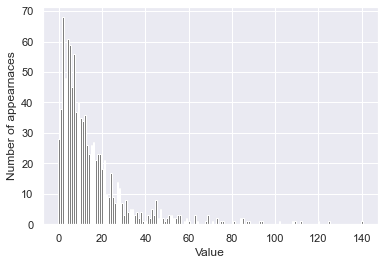

In [282]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel('Number of appearnaces')
plt.xlabel('Value')

- long-tail과 비슷한 분포를 나타냄

In [283]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# R square
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score : {:.3f}".format(score))

Test score : 0.622


R square : 1에 가까울 수록 데이터를 잘 설명하고 있다는 것을 의미

In [284]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

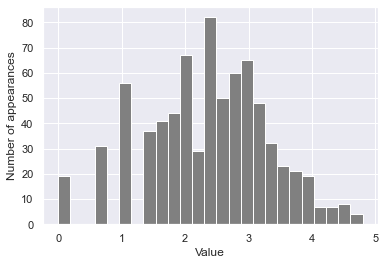

In [285]:
plt.hist(X_train_log[:,0], bins=25, color = 'gray')
plt.ylabel('Number of appearances')
plt.xlabel('Value')

In [286]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:3f}".format(score))

Test score: 0.874934


## 3️⃣ Feature Engineering 2
### Mean encoding
- Category 데이터는 항상 One-hot Encoding하는 것은 ❌  
다양한 Encoding 기법이 있다  

- 대표적인 방법으로 Y값에 대한 분포를 활용한 Mean Encoding이 사용됨  

- Label Encoding은 그 자체로 정보가 존재하지 않음    

- 0,1 이런식이면 상관관계를 나타내기 어려움 => groupby 해서 나온 값을 가지고 encoding  

- Mean Encoding : 분포의 값을 취할 수 있음    

- 조금 더 빨리, 나은 성능이 나오기도 함  

- Regression Task는 단순 평균값으로 입력  
label_c = P_c  

- Overfitting을 제거하기 위해 smoothing을 사용  
α 알파값을 더해줌  

In [287]:
DATA_DIR = './titanic'
os.listdir(DATA_DIR)
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
# 모판 만들기(한판으로)
df = pd.concat(df_list, sort = False)
# 중복되는 index발생 => reset_index로 처리
# 인덱스가 출력되지 않도록 : drop = True
df = df.reset_index(drop = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [288]:
# null이 아닌거
number_of_train_dataset = df.Survived.notnull().sum()
# null인거
number_of_test_dataset = df.Survived.isnull().sum()
# pop : 데이터 잘라냄 => number_of_train_dataset까지 잘라냄 
y_true = df.pop("Survived")[:number_of_train_dataset]
y_true

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [289]:
def merge_and_get(ldf, rdf, on, how = "inner", index = None):
    if index is True :
        return pd.merge(ldf, rdf, how = how, left_index = True, right_index = True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

one_hot_df = merge_and_get(
    df, pd.get_dummies(df['Sex'], prefix = 'Sex'), on =None, index=True) # sex_modified, index를 기준으로

one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Pclass'], prefix='Pclass'), on = None, index=True)

one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Embarked'], prefix='Embarked'), on = None, index=True)

one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,1,0,0,1,0,0,1


In [290]:
temp_df = pd.merge(one_hot_df['Pclass'], y_true, left_index=True, right_index=True)
temp_df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [291]:
temp_df['Pclass'].replace(
    temp_df.groupby('Pclass')['Survived'].mean())

0      0.242363
1      0.629630
2      0.242363
3      0.629630
4      0.242363
         ...   
886    0.472826
887    0.629630
888    0.242363
889    0.629630
890    0.242363
Name: Pclass, Length: 891, dtype: float64

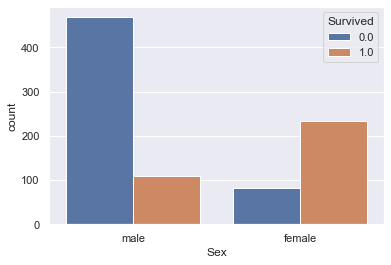

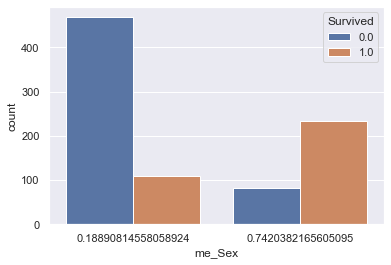

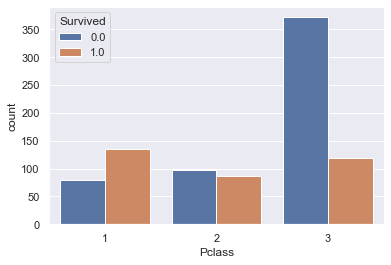

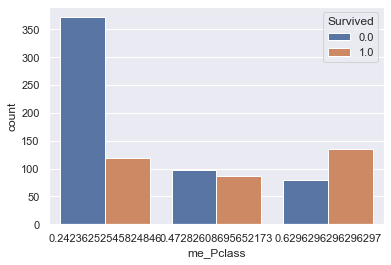

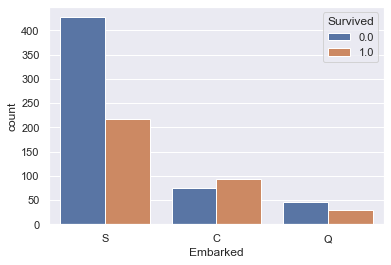

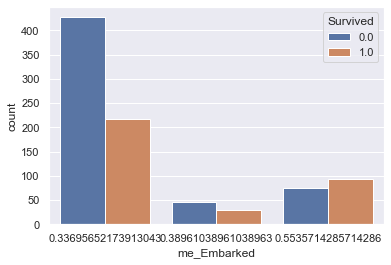

,Embarked,Survived,me_Embarked
0,S,0.0,0.336957
1,C,1.0,0.553571
2,S,1.0,0.336957
3,S,1.0,0.336957
4,S,0.0,0.336957
...,...,...,...
886,S,0.0,0.336957
887,S,1.0,0.336957
888,S,0.0,0.336957
889,C,1.0,0.553571


In [292]:
import seaborn as sns
temp_columns = ['Sex','Pclass','Embarked']

me_list = []
for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    temp_df["me_"+col_name] = temp_df[col_name].replace(temp_df.groupby(col_name)['Survived'].mean())

    sns.countplot(x=col_name, hue='Survived', data = temp_df)
    plt.show()
    sns.countplot(x="me_"+col_name, hue='Survived', data = temp_df)
    plt.show()

temp_df



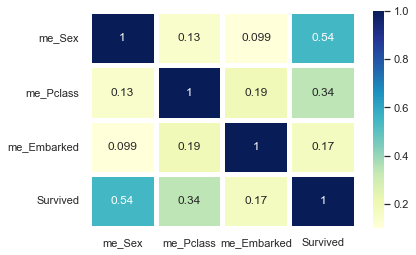

In [293]:
temp_columns = ['Sex','Pclass','Embarked']

me_list = []
for col_name in temp_columns:
    # 자동화시키기
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    temp_df["me_"+col_name] = temp_df[col_name].replace(temp_df.groupby(col_name)['Survived'].mean())

    # sns.countplot(x=col_name, hue='Survived', data = temp_df)
    # plt.show()
    # sns.countplot(x="me_"+col_name, hue='Survived', data = temp_df)
    # plt.show()

    me_list.append(temp_df.drop('Survived', axis = 1))

temp_df = pd.merge(
    pd.concat(me_list, axis=1)[['me_' + col_name for col_name in temp_columns]],
    y_true, left_index=True, right_index=True)

# correlation
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot = True, linewidths = 5, cmap='YlGnBu')

In [294]:
me_list

[        Sex    me_Sex
 0      male  0.188908
 1    female  0.742038
 2    female  0.742038
 3    female  0.742038
 4      male  0.188908
 ..      ...       ...
 886    male  0.188908
 887  female  0.742038
 888  female  0.742038
 889    male  0.188908
 890    male  0.188908
 
 [891 rows x 2 columns],
      Pclass  me_Pclass
 0         3   0.242363
 1         1   0.629630
 2         3   0.242363
 3         1   0.629630
 4         3   0.242363
 ..      ...        ...
 886       2   0.472826
 887       1   0.629630
 888       3   0.242363
 889       1   0.629630
 890       3   0.242363
 
 [891 rows x 2 columns],
     Embarked  me_Embarked
 0          S     0.336957
 1          C     0.553571
 2          S     0.336957
 3          S     0.336957
 4          S     0.336957
 ..       ...          ...
 886        S     0.336957
 887        S     0.336957
 888        S     0.336957
 889        C     0.553571
 890        Q     0.389610
 
 [891 rows x 2 columns]]

In [295]:
me_list[0]

,Sex,me_Sex
0,male,0.188908
1,female,0.742038
2,female,0.742038
3,female,0.742038
4,male,0.188908
...,...,...
886,male,0.188908
887,female,0.742038
888,female,0.742038
889,male,0.188908


In [296]:
me_list[1]

,Pclass,me_Pclass
0,3,0.242363
1,1,0.629630
2,3,0.242363
3,1,0.629630
4,3,0.242363
...,...,...
886,2,0.472826
887,1,0.629630
888,3,0.242363
889,1,0.629630


In [297]:
me_list[2]

,Embarked,me_Embarked
0,S,0.336957
1,C,0.553571
2,S,0.336957
3,S,0.336957
4,S,0.336957
...,...,...
886,S,0.336957
887,S,0.336957
888,S,0.336957
889,C,0.553571


- 이외에도 많은 Encoding 기법 존재

### Iteraction features
- 기존 feature들의 조합으로 새로운 feature 생성
- 여러가지 feature를 합쳐서 사용
- Data에 대한 사전 지식과 이해 필요
- Polynomial feature를 사용한 자동화 가능 => 높은 비용
- 실험적으로 접근할 요소들은 있음 -> 자동화 코ㄷ,
- weight + time-period, sensor1 + sensor2

#### Categorical Combination

In [298]:
temp_columns = ['Sex','Pclass','Embarked']
one_hot_df['Sex-Pclass'] = df['Sex'].map(str) + df['Pclass'].map(str)
one_hot_df['Embarked-Pclass'] = df['Embarked'].map(str) + df['Pclass'].map(str)
# Sex_modified
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df['Sex-Pclass'], prefix = 'SexPclass'), on=None, index= True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df['Embarked-Pclass'], prefix = 'EmbarkedPclass'), on=None, index= True)
one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,EmbarkedPclass_nan1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,0,0,0,0,0,0,0,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0


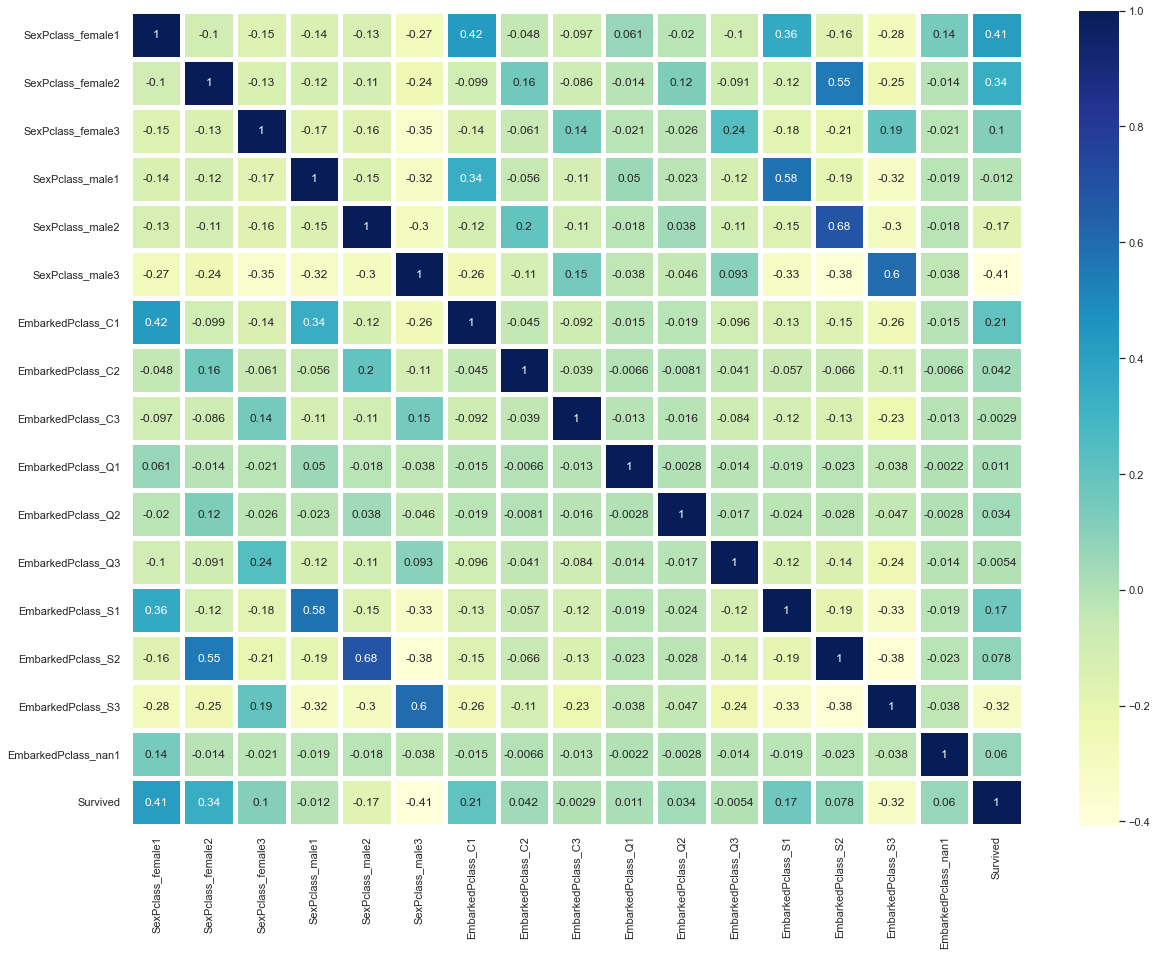

In [299]:
# 비교하고 싶은 column
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                        if col_name.split('_')[0] in ['SexPclass', 'EmbarkedPclass'] and '_' in col_name]

temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True)

corr = temp_df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot= True, linewidths=5, cmap='YlGnBu')


#### Etc
- Feature끼리 더하기,곱하기,나누기 등
- 왜 잘되는지 모르는데 잘 되는 경우 존재
- 도메인 지식과 EDA로 좋은 Feature들을 생성해야함

### 4️⃣ Feature engineering 3
#### Numeric data types

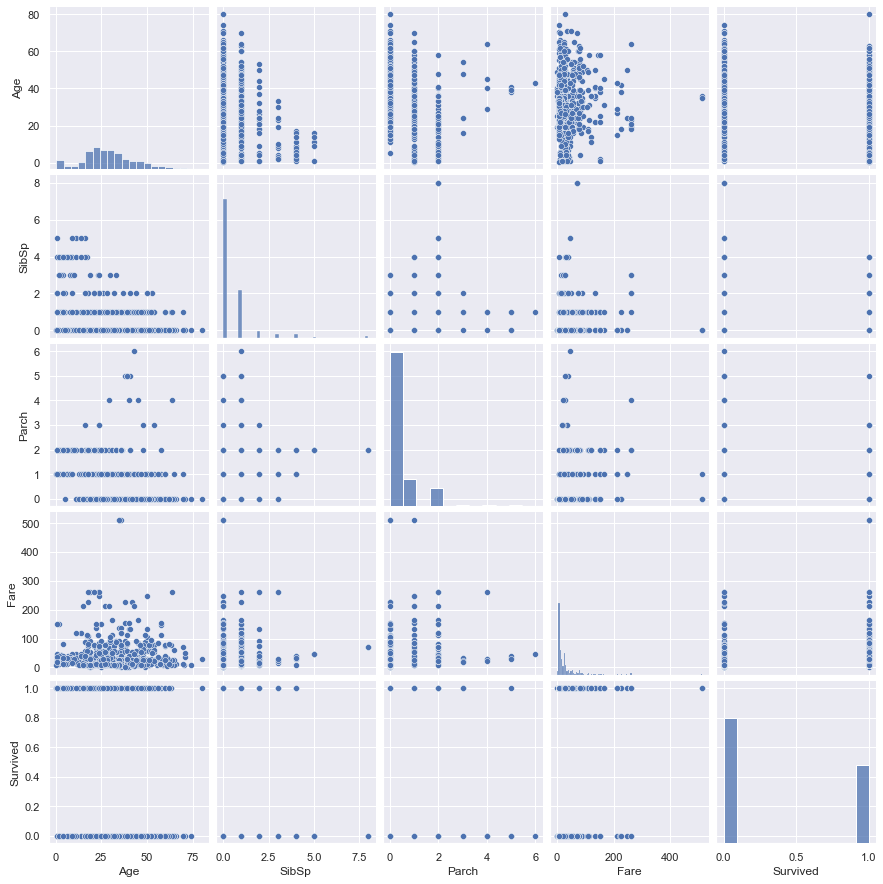

In [300]:
numeric_columns = ["Age","SibSp","Parch","Fare"]
temp_df = pd.merge(one_hot_df[numeric_columns], y_true, left_index=True, right_index=True)
sns.pairplot(temp_df)

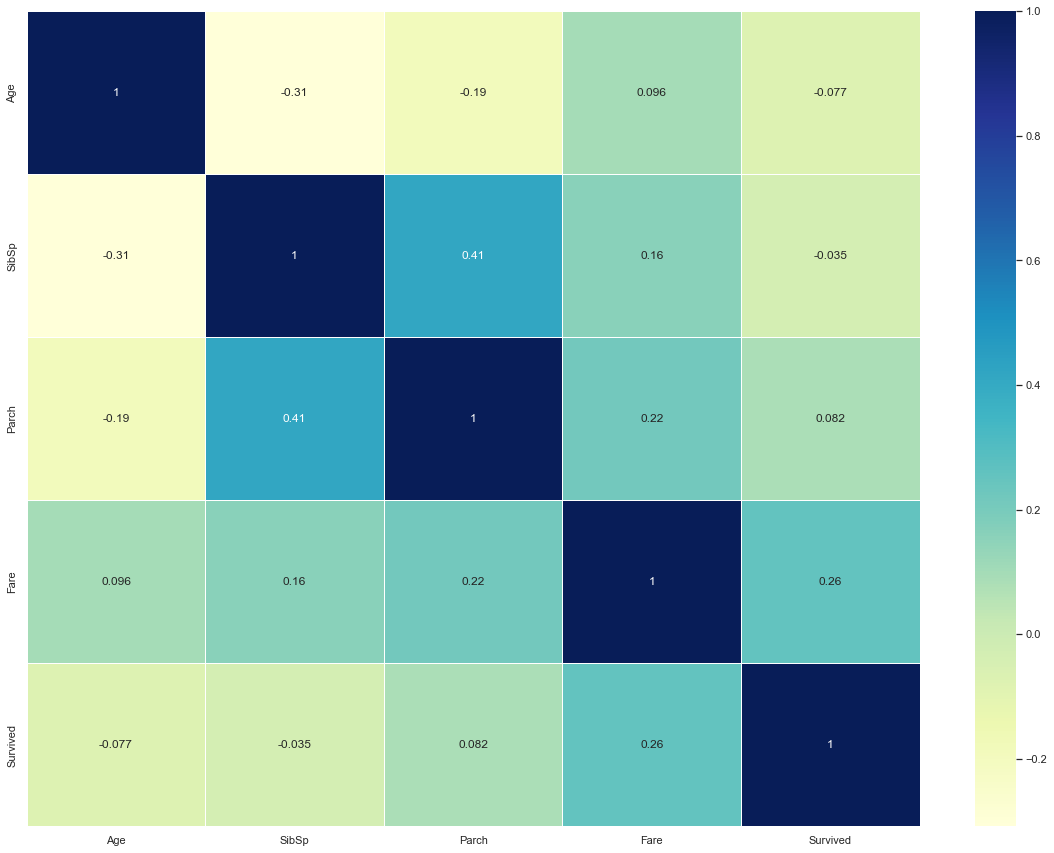

In [301]:
corr = temp_df.corr()
sns.set()
plt.subplots(figsize = (20,15))
ax = sns.heatmap(corr, annot=True, linewidths=.8, cmap = "YlGnBu")

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

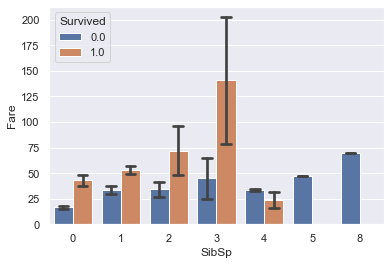

In [302]:
sns.barplot(x="SibSp", y="Fare", hue='Survived', data=temp_df, ci = 68, capsize=.2)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

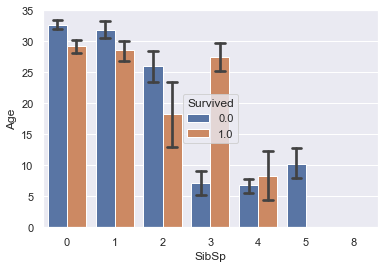

In [303]:
sns.barplot(x="SibSp", y="Age", hue='Survived', data=temp_df, ci = 68, capsize=.2)

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

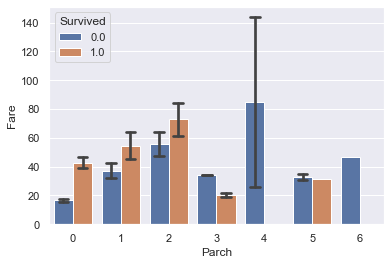

In [304]:
sns.barplot(x="Parch", y="Fare", hue='Survived', data=temp_df, ci = 68, capsize=.2)

### Bining

In [305]:
one_hot_df['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

<AxesSubplot:>

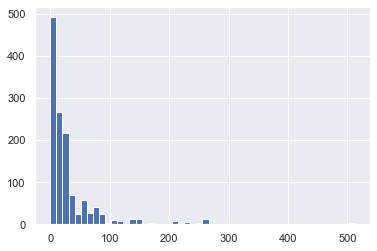

In [306]:
one_hot_df['Fare'].hist(bins=50)

In [307]:
one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,EmbarkedPclass_nan1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,0,0,0,0,0,0,0,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0


In [308]:
DATA_DIR = './titanic'
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))

df = pd.concat(df_list, sort=False) 
df = df.reset_index(drop=True) 

number_of_train_dataset = df.Survived.notnull().sum() 
number_of_test_dataset = df.Survived.isnull().sum() 
y_true = df.pop("Survived")[:number_of_train_dataset] 

df["Age"] = df["Age"].fillna(
    df.groupby(["Pclass"])["Age"].transform("mean")
)

object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

# 데이터 타입 변경
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
    
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

df.loc[61, "Embarked"] = "S"
df.loc[829, "Embarked"] = "S"

# df 2개를 inner로 merge해주는 함수
def merge_and_get(ldf, rdf, on, how="inner", index = None):
    if index is True:
        return pd.merge(ldf, rdf, how = how, left_index = True, right_index = True)
    else:
        return pd.merge(ldf, rdf, how = how, on = on)

one_hot_df = merge_and_get(df, pd.get_dummies(df["Sex"], prefix = "Sex"), on = None, index = True) # sex_modified
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(df["Pclass"], prefix = "Pclass"), on = None, index = True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(df["Embarked"], prefix = "Embarked"), on = None, index = True)
one_hot_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0


- Mean Encoding

In [309]:
temp_df = pd.merge(
    one_hot_df["Pclass"], y_true, left_index = True, right_index = True)
temp_df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [310]:
temp_df["Pclass"].replace(
    temp_df.groupby("Pclass")["Survived"].mean())

0      0.242363
1      0.629630
2      0.242363
3      0.629630
4      0.242363
         ...   
886    0.472826
887    0.629630
888    0.242363
889    0.629630
890    0.242363
Name: Pclass, Length: 891, dtype: float64

In [311]:
temp_columns = ["Sex", "Pclass", "Embarked"]

me_list = []
for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index = True, right_index = True)
    temp_df["me_"+col_name] = temp_df[col_name].replace(temp_df.groupby(col_name)["Survived"].mean())
    me_list.append(temp_df.drop("Survived", axis = 1))
    # sns.countplot(x = col_name, hue = "Survived", data = temp_df)
    # plt.show()
    # sns.countplot(x = "me_" + col_name, hue = "Survived", data = temp_df)
    # plt.show()
me_list[2]

,Embarked,me_Embarked
0,S,0.339009
1,C,0.553571
2,S,0.339009
3,S,0.339009
4,S,0.339009
...,...,...
886,S,0.339009
887,S,0.339009
888,S,0.339009
889,C,0.553571


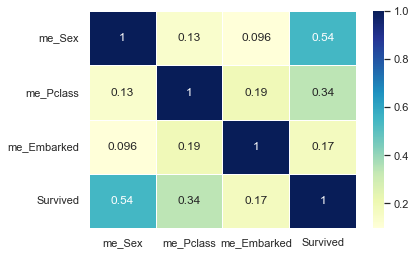

In [312]:
temp_df = pd.merge(
    pd.concat(me_list, axis = 1)[["me_" + col_name for col_name in temp_columns]],
    y_true, left_index = True, right_index = True)
# temp_df

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot = True, linewidths = 0.5, cmap = "YlGnBu")

- Interaction feature

In [313]:
temp_columns = ["Sex", "Pclass", "Embarked"]
one_hot_df["Sex-Pclass"] = df["Sex"].map(str) + df["Pclass"].map(str)
one_hot_df["Embarked-Pclass"] = df["Embarked"].map(str) + df["Pclass"].map(str)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df["Sex-Pclass"], prefix = "SexPclass"), on = None, index = True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df["Embarked-Pclass"], prefix = "EmbarkedPclass"), on = None, index = True)
one_hot_df.head(2)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SexPclass_male3,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,1,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,1,0,0,0,0,0,0,0,0


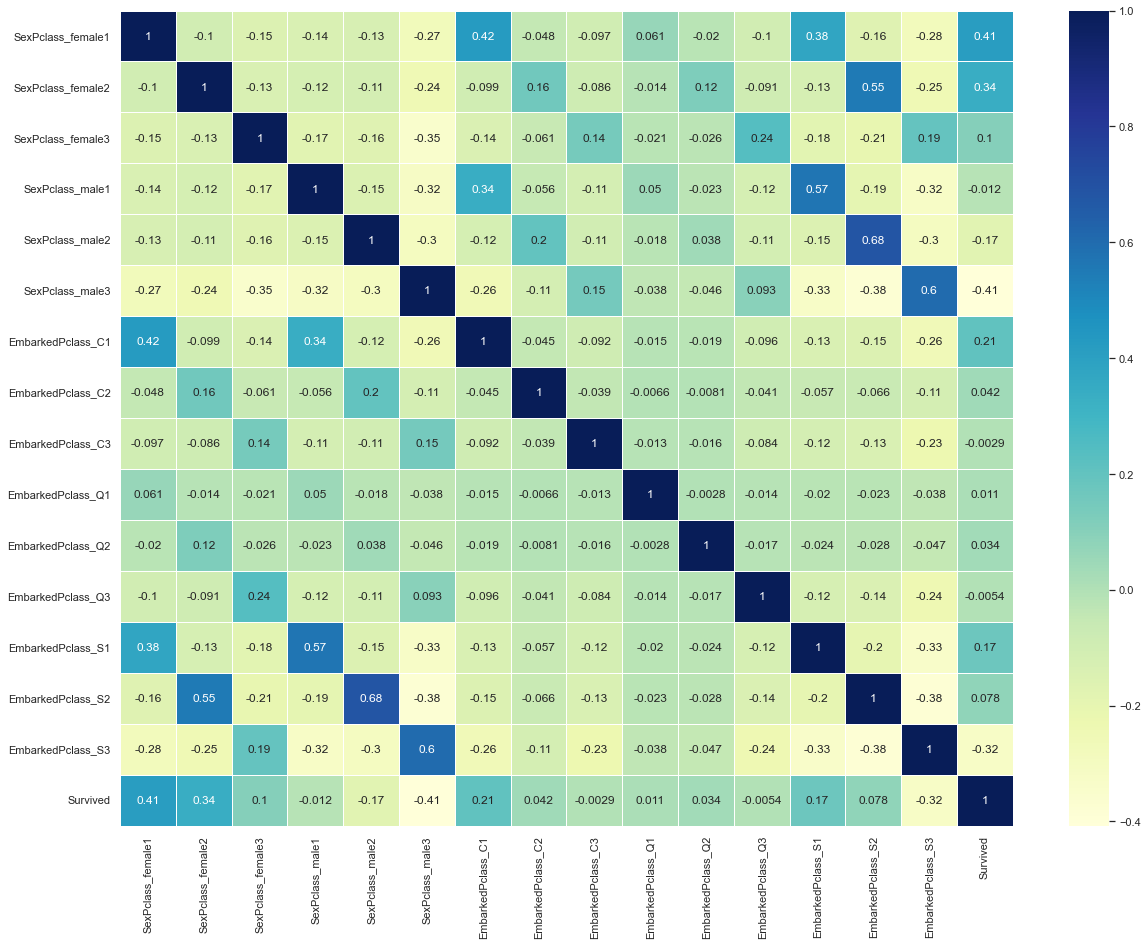

In [314]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                      if col_name.split("_")[0] in ["SexPclass", "EmbarkedPclass"] and "_" in col_name]
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true, left_index = True, right_index = True)

corr = temp_df.corr()
plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corr, annot = True, linewidths = 0.5, cmap = "YlGnBu")

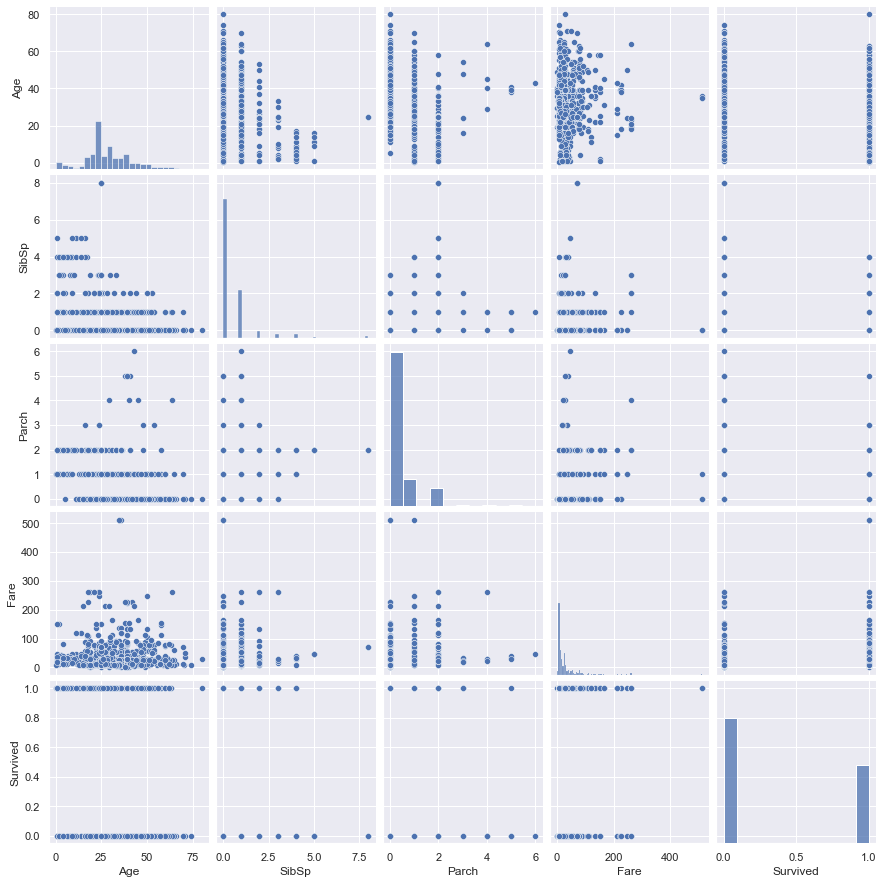

In [ ]:
temp_df = pd.merge(one_hot_df[numeric_columns], y_true, left_index = True, right_index = True)

sns.pairplot(temp_df)|

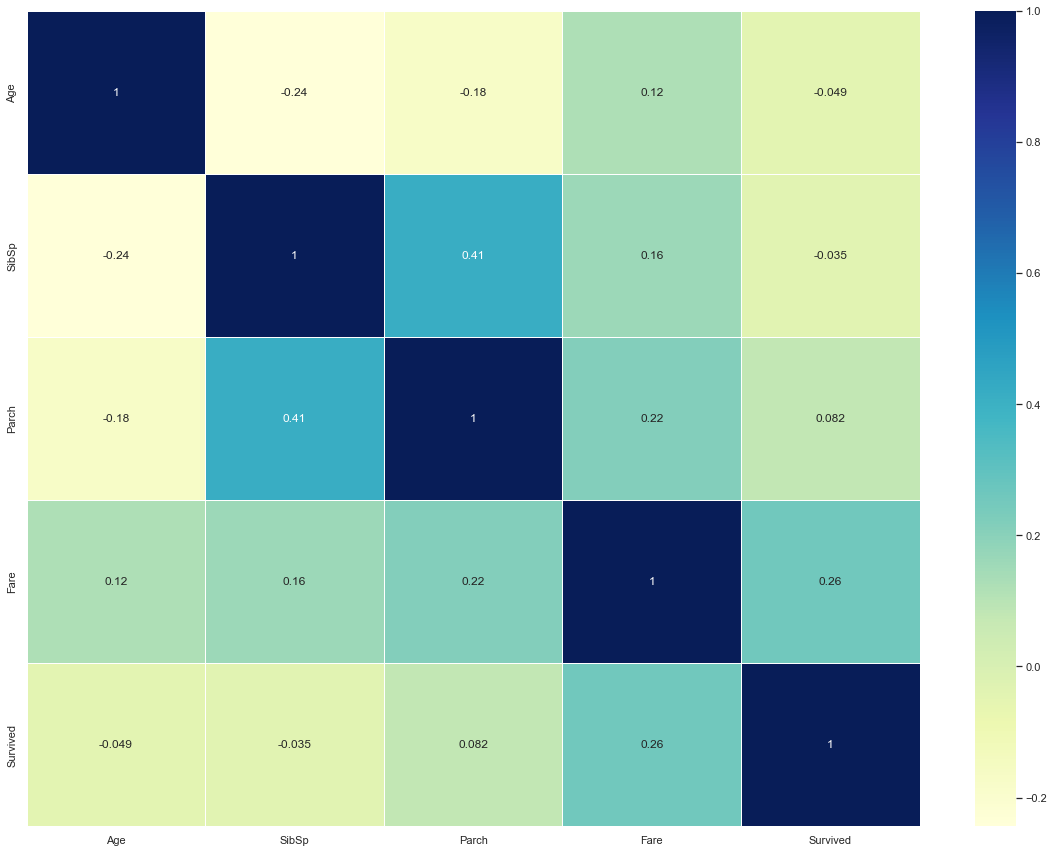

In [ ]:
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot = True, linewidths = 0.8, cmap = "YlGnBu")

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

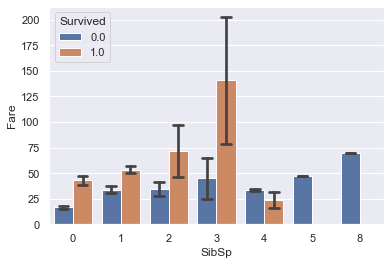

In [338]:
sns.barplot(x = "SibSp", y = "Fare", hue = "Survived", data = temp_df, ci = 68, capsize = 0.2)

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

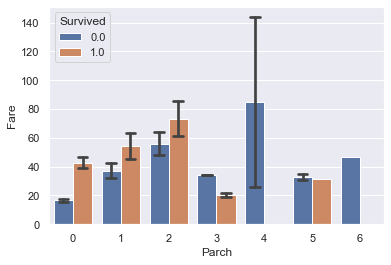

In [339]:
sns.barplot(x = "Parch", y = "Fare", hue = "Survived", data = temp_df, ci = 68, capsize = 0.2)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

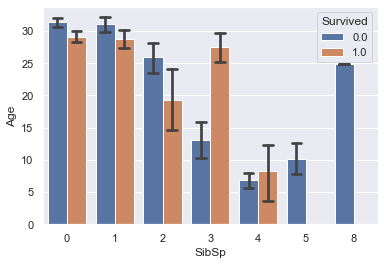

In [340]:
sns.barplot(x = "SibSp", y = "Age", hue = "Survived", data = temp_df, ci = 68, capsize = 0.2)

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

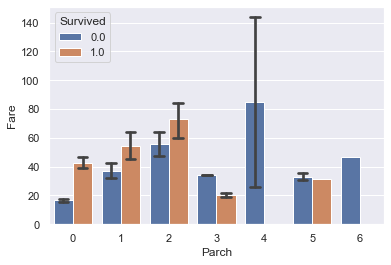

In [341]:
sns.barplot(x = "Parch", y = "Fare", hue = "Survived", data = temp_df, ci = 68, capsize = 0.2)

### Binning

In [342]:
one_hot_df["Fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

<AxesSubplot:>

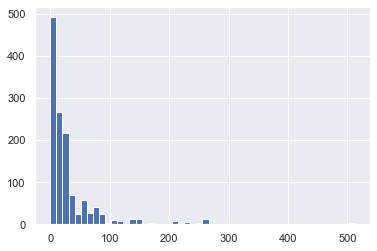

In [343]:
one_hot_df["Fare"].hist(bins = 50)

### Long Transform

In [344]:
bin_one_hot_df = one_hot_df.copy()

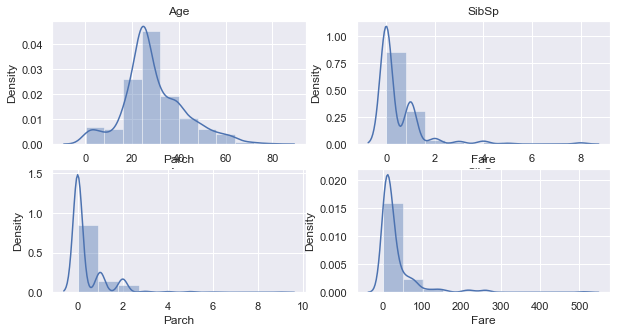

In [345]:
fig = plt.figure()
fig.set_size_inches(10, 5)

ax = []
for i, col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2, 2, i+1))
    X_1 = bin_one_hot_df[col_name]

    ax[i] = sns.distplot(X_1, bins = 10)
    ax[i].set_title(col_name)

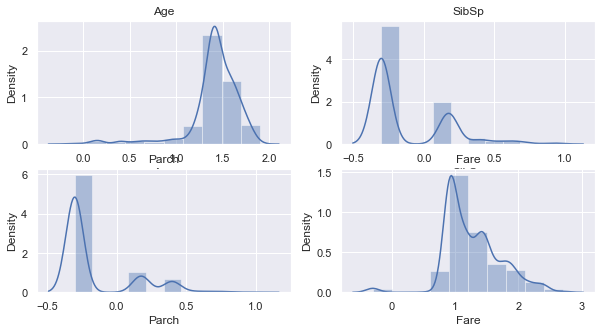

In [346]:
fig = plt.figure()
fig.set_size_inches(10, 5)

ax = []
for i, col_name in enumerate(numeric_columns):
    ax.append(fig.add_subplot(2, 2, i+1))
    X_1 = np.log10(bin_one_hot_df[col_name] + 0.5)

    ax[i] = sns.distplot(X_1, bins = 10)
    ax[i].set_title(col_name)

In [347]:
bin_one_hot_df.isnull().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    1
Cabin                1014
Embarked                0
Sex_female              0
Sex_male                0
Pclass_1                0
Pclass_2                0
Pclass_3                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Sex-Pclass              0
Embarked-Pclass         0
SexPclass_female1       0
SexPclass_female2       0
SexPclass_female3       0
SexPclass_male1         0
SexPclass_male2         0
SexPclass_male3         0
EmbarkedPclass_C1       0
EmbarkedPclass_C2       0
EmbarkedPclass_C3       0
EmbarkedPclass_Q1       0
EmbarkedPclass_Q2       0
EmbarkedPclass_Q3       0
EmbarkedPclass_S1       0
EmbarkedPclass_S2       0
EmbarkedPclass_S3       0
dtype: int64

- Null값 채우기

In [366]:
bin_one_hot_df["Fare"] = bin_one_hot_df["Fare"].fillna(bin_one_hot_df["Fare"].mean())

In [367]:
bin_one_hot_df["Fare"].isnull().sum()

0

In [377]:
log_bin_one_hot_df = merge_and_get(
    bin_one_hot_df, np.log10(bin_one_hot_df['Fare']+0.5), on=None, index=True)

log_bin_one_hot_df.rename(columns = {'Fare_x':'Fare', 'Fare_y':'log_fare'}, inplace=True)
log_bin_one_hot_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,log_fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0.889302
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,0,0,0,1.856023
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,0.925570
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,1.729165
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0.931966


In [378]:
object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age","SibSp","Parch","Fare"]

In [379]:
object_columns

['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

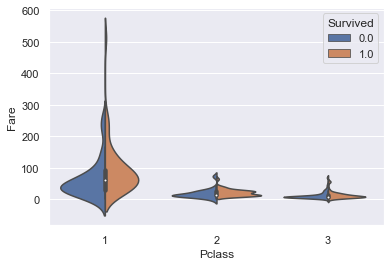

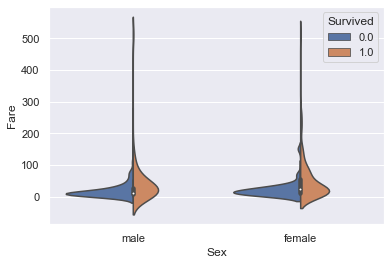

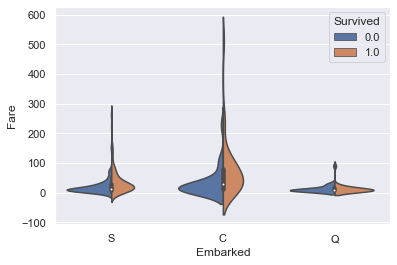

In [380]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)
for col_name in ['Pclass','Sex','Embarked']:
    sns.violinplot(x=col_name, y='Fare', hue='Survived', data=temp_df, split=True)
    plt.show()

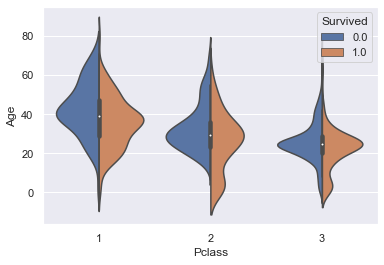

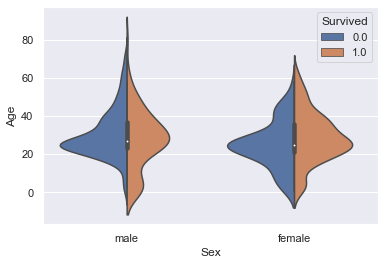

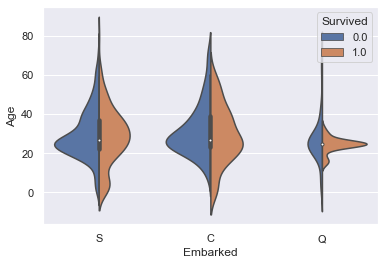

In [381]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)
for col_name in ['Pclass','Sex','Embarked']:
    sns.violinplot(x=col_name, y='Age', hue='Survived', data=temp_df, split=True)
    plt.show()

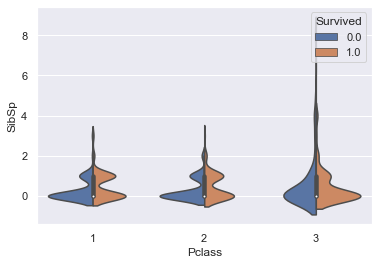

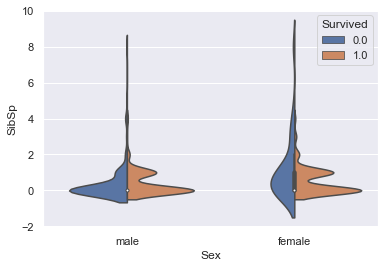

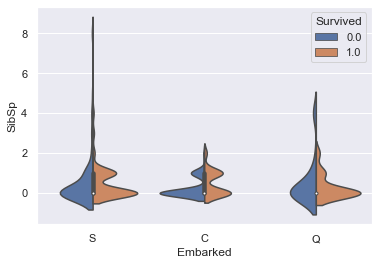

In [382]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)
for col_name in ['Pclass','Sex','Embarked']:
    sns.violinplot(x=col_name, y='SibSp', hue='Survived', data=temp_df, split=True)
    plt.show()

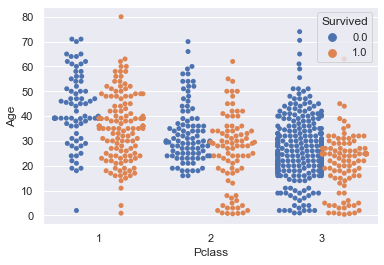

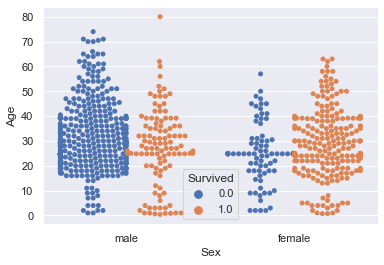

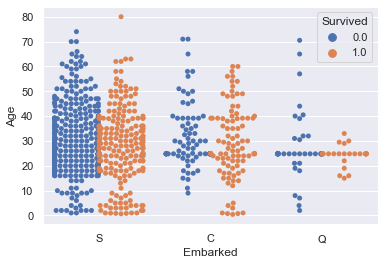

In [383]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)
for col_name in ['Pclass','Sex','Embarked']:
    sns.swarmplot(x=col_name, y='Age', hue='Survived', data=temp_df, split=True)
    plt.show()

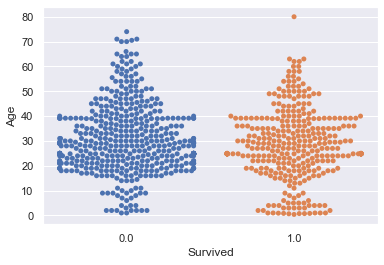

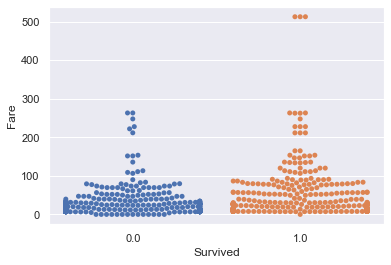

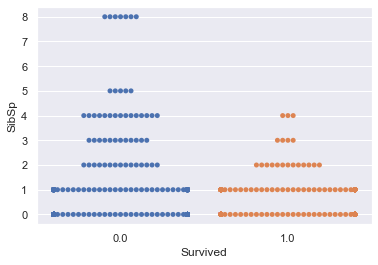

In [384]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)
for col_name in ['Age','Fare','SibSp']:
    sns.swarmplot(x='Survived', y=col_name, data=temp_df, split=True)
    plt.show()

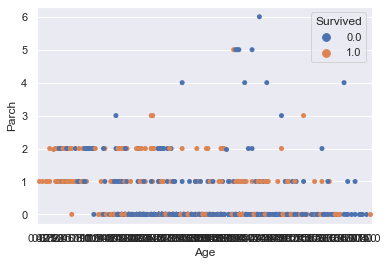

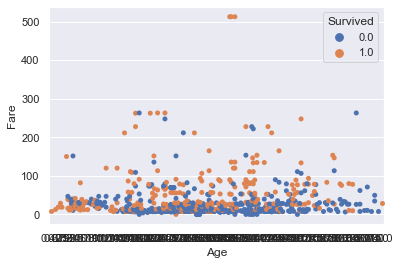

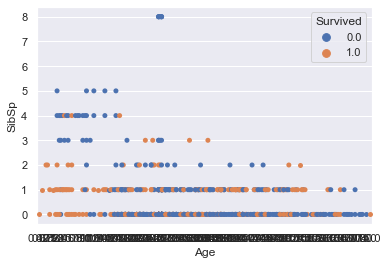

In [385]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index=True, right_index=True)
for col_name in ['Parch','Fare','SibSp']:
    sns.swarmplot(x='Age', y=col_name, data=temp_df, hue='Survived')
    plt.show()

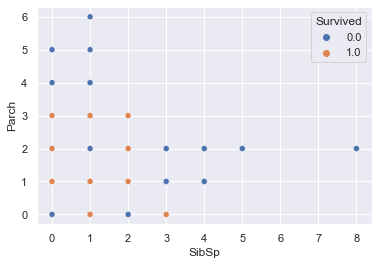

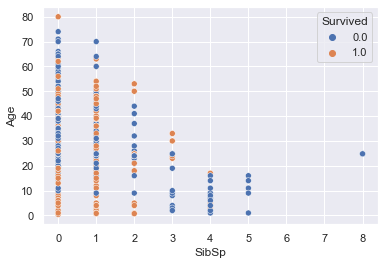

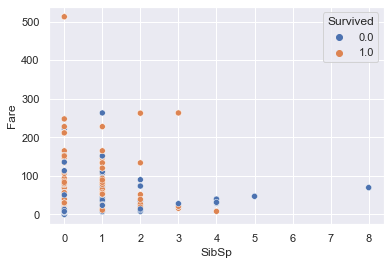

In [386]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index = True, right_index = True)

for col_name in ["Parch", "Age", "Fare"]:
    sns.scatterplot(x = "SibSp", y = col_name, data = temp_df, hue = "Survived")
    plt.show()

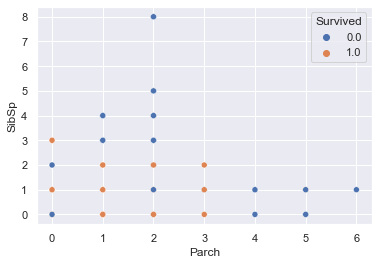

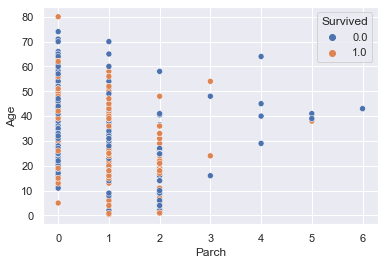

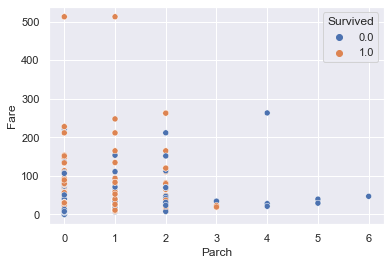

In [387]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index = True, right_index = True)

for col_name in ["SibSp", "Age", "Fare"]:
    sns.scatterplot(x = "Parch", y = col_name, data = temp_df, hue = "Survived")
    plt.show()

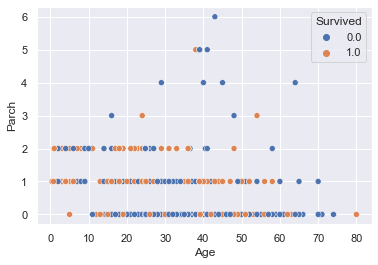

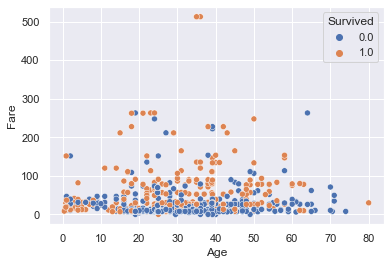

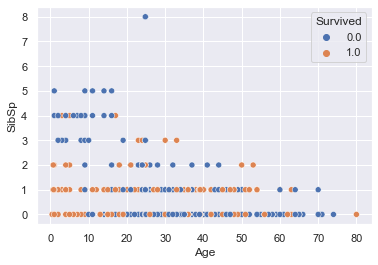

In [388]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index = True, right_index = True)

for col_name in ["Parch", "Fare", "SibSp"]:
    sns.scatterplot(x = "Age", y = col_name, data = temp_df, hue = "Survived")
    plt.show()

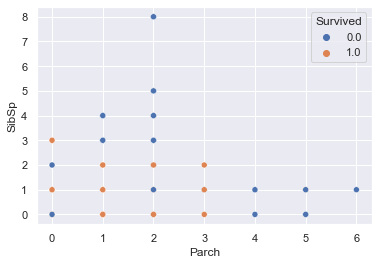

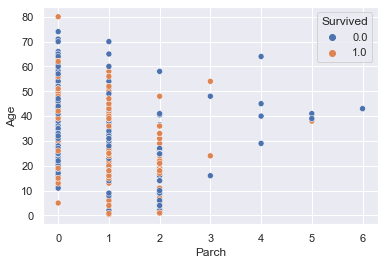

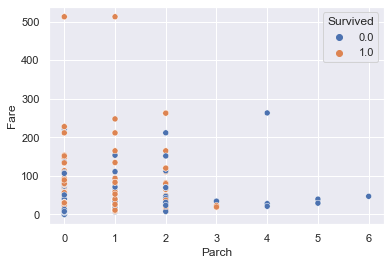

In [389]:
temp_df = pd.merge(log_bin_one_hot_df[numeric_columns + object_columns], y_true, left_index = True, right_index = True)

for col_name in ["SibSp", "Age", "Fare"]:
    sns.scatterplot(x = "Parch", y = col_name, data = temp_df, hue = "Survived")
    plt.show()

In [390]:
log_bin_one_hot_df[numeric_columns].isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64

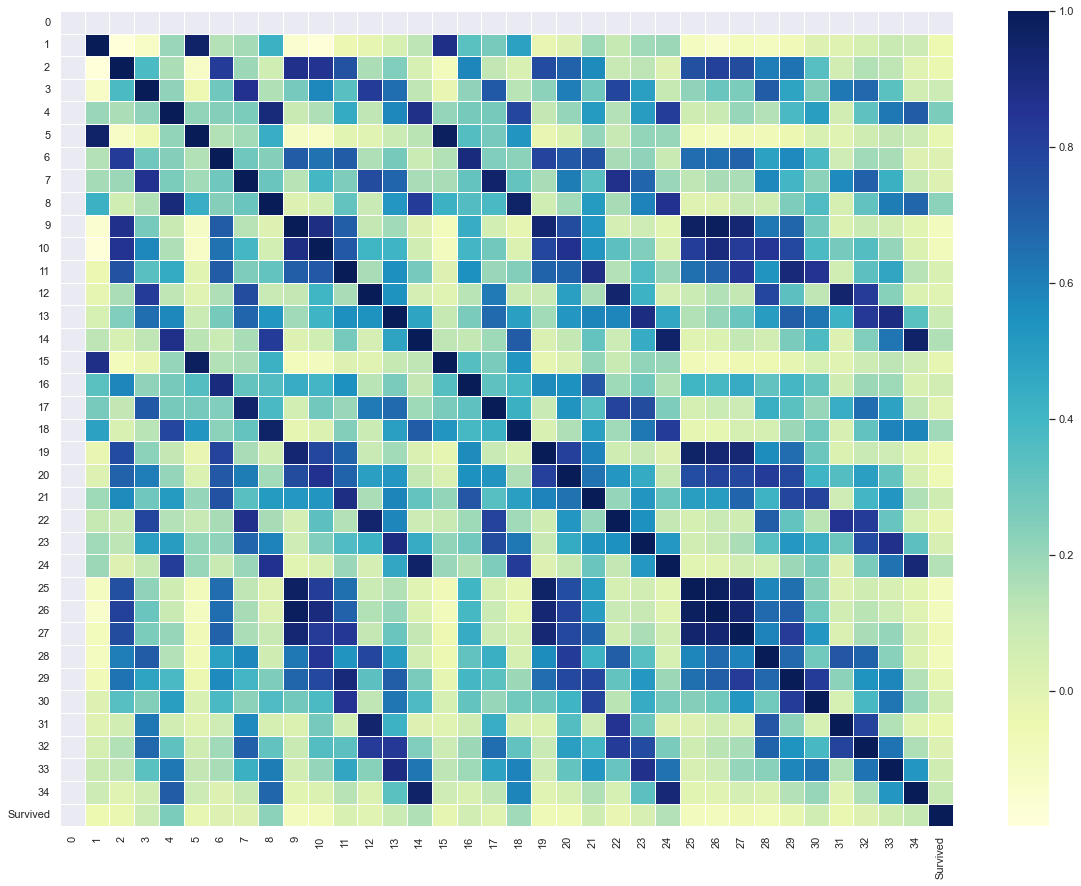

In [391]:
# 3개 이상의 feature를 섞어서 corr이 높은 걸 찾을 수있는지

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3)
X_poly = pd.DataFrame(
    poly_features.fit_transform(log_bin_one_hot_df[numeric_columns]))

temp_df = pd.concat([X_poly, y_true], axis = 1)
corr = temp_df.corr()
sns.set()
plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corr, linewidths = 0.8, cmap = "YlGnBu")

### String handling

In [397]:
from collections import Counter
Counter((log_bin_one_hot_df["Name"].str.lower() + " ").sum().split()).most_common(3)

log_bin_one_hot_df['is_mr'] = log_bin_one_hot_df['Name'].str.lower().str.contains(pat = 'mr.')
log_bin_one_hot_df['is_miss'] = log_bin_one_hot_df['Name'].str.lower().str.contains(pat = 'miss.')
log_bin_one_hot_df['is_mrs'] = log_bin_one_hot_df['Name'].str.lower().str.contains(pat = 'mrs.')

In [398]:

log_bin_one_hot_df["Ticket"]

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
               ...        
1304             A.5. 3236
1305              PC 17758
1306    SOTON/O.Q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

In [399]:
log_bin_one_hot_df["Ticket"].str.rsplit(expand = True, )

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
1304,A.5.,3236,None
1305,PC,17758,None
1306,SOTON/O.Q.,3101262,None
1307,359309,None,None


In [400]:
log_bin_one_hot_df["Ticket"].str.extractall('(\d+)')

0
     match         
0    0            5
     1        21171
1    0        17599
2    0            2
     1      3101282
...             ...
1304 1         3236
1305 0        17758
1306 0      3101262
1307 0       359309
1308 0         2668

[1373 rows x 1 columns]

In [401]:
Counter((log_bin_one_hot_df["Ticket"].str.lower() + " ").sum().split()).most_common(30)

[('pc', 92),
 ('c.a.', 46),
 ('sc/paris', 16),
 ('soton/o.q.', 16),
 ('2.', 15),
 ('w./c.', 14),
 ('ston/o', 14),
 ('a/5', 12),
 ('ca.', 12),
 ('2343', 11),
 ('a/5.', 10),
 ('ca', 10),
 ('f.c.c.', 9),
 ('2144', 8),
 ('1601', 8),
 ('soton/oq', 8),
 ('c', 8),
 ('ston/o2.', 7),
 ('347082', 7),
 ('347077', 7),
 ('3101295', 7),
 ('s.o.c.', 7),
 ('14879', 7),
 ('17608', 7),
 ('s.o./p.p.', 7),
 ('382652', 6),
 ('19950', 6),
 ('347088', 6),
 ('113781', 6),
 ('a/4', 6)]

In [403]:
log_bin_one_hot_df['is_pc'] = log_bin_one_hot_df['Ticket'].str.lower().str.contains(pat = 'pc')
log_bin_one_hot_df['is_ca'] = log_bin_one_hot_df['Ticket'].str.lower().str.contains(pat = 'c.a.')
log_bin_one_hot_df['is_paris'] = log_bin_one_hot_df['Ticket'].str.lower().str.contains(pat = 'paris')
log_bin_one_hot_df['is_soton'] = log_bin_one_hot_df['Ticket'].str.lower().str.contains(pat = 'soton')
log_bin_one_hot_df['is_ston'] = log_bin_one_hot_df['Ticket'].str.lower().str.contains(pat = 'ston')
log_bin_one_hot_df['is_so'] = log_bin_one_hot_df['Ticket'].str.lower().str.contains(pat = 's.o')

log_bin_one_hot_df
log_bin_one_hot_df.isnull().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                1014
Embarked                0
Sex_female              0
Sex_male                0
Pclass_1                0
Pclass_2                0
Pclass_3                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Sex-Pclass              0
Embarked-Pclass         0
SexPclass_female1       0
SexPclass_female2       0
SexPclass_female3       0
SexPclass_male1         0
SexPclass_male2         0
SexPclass_male3         0
EmbarkedPclass_C1       0
EmbarkedPclass_C2       0
EmbarkedPclass_C3       0
EmbarkedPclass_Q1       0
EmbarkedPclass_Q2       0
EmbarkedPclass_Q3       0
EmbarkedPclass_S1       0
EmbarkedPclass_S2       0
EmbarkedPclass_S3       0
log_fare                0
is_mr                   0
is_miss     

In [404]:
test = log_bin_one_hot_df['Cabin'].fillna('99999')
Counter((test.str.lower() + ' ').sum().split()).most_common(30)

[('99999', 1014),
 ('f', 8),
 ('c23', 6),
 ('c25', 6),
 ('c27', 6),
 ('g6', 5),
 ('b57', 5),
 ('b59', 5),
 ('b63', 5),
 ('b66', 5),
 ('f33', 4),
 ('f2', 4),
 ('f4', 4),
 ('c78', 4),
 ('d', 4),
 ('c22', 4),
 ('c26', 4),
 ('b96', 4),
 ('b98', 4),
 ('e46', 3),
 ('b58', 3),
 ('b60', 3),
 ('e101', 3),
 ('e34', 3),
 ('a34', 3),
 ('c101', 3),
 ('b51', 3),
 ('b53', 3),
 ('b55', 3),
 ('c85', 2)]

In [405]:
log_bin_one_hot_df['is_cabin_none'] = test.str.contains(pat = '9999')
log_bin_one_hot_df['is_cabin_a'] = test.str.contains(pat = 'a')
log_bin_one_hot_df['is_cabin_b'] = test.str.contains(pat = 'b')
log_bin_one_hot_df['is_cabin_c'] = test.str.contains(pat = 'c')
log_bin_one_hot_df['is_cabin_d'] = test.str.contains(pat = 'd')
log_bin_one_hot_df['is_cabin_e'] = test.str.contains(pat = 'e')
log_bin_one_hot_df['is_cabin_f'] = test.str.contains(pat = 'f')
log_bin_one_hot_df['is_cabin_g'] = test.str.contains(pat = 'g')

일종의 binary encoding

In [406]:
log_bin_one_hot_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex-Pclass', 'Embarked-Pclass', 'SexPclass_female1',
       'SexPclass_female2', 'SexPclass_female3', 'SexPclass_male1',
       'SexPclass_male2', 'SexPclass_male3', 'EmbarkedPclass_C1',
       'EmbarkedPclass_C2', 'EmbarkedPclass_C3', 'EmbarkedPclass_Q1',
       'EmbarkedPclass_Q2', 'EmbarkedPclass_Q3', 'EmbarkedPclass_S1',
       'EmbarkedPclass_S2', 'EmbarkedPclass_S3', 'log_fare', 'is_mr',
       'is_miss', 'is_mrs', 'is_pc', 'is_ca', 'is_paris', 'is_soton',
       'is_ston', 'is_so', 'is_cabin_none', 'is_cabin_a', 'is_cabin_b',
       'is_cabin_c', 'is_cabin_d', 'is_cabin_e', 'is_cabin_f', 'is_cabin_g'],
      dtype='object')

In [407]:
log_bin_one_hot_df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [408]:
log_bin_one_hot_df.isnull().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                1014
Embarked                0
Sex_female              0
Sex_male                0
Pclass_1                0
Pclass_2                0
Pclass_3                0
Embarked_C              0
Embarked_Q              0
Embarked_S              0
Sex-Pclass              0
Embarked-Pclass         0
SexPclass_female1       0
SexPclass_female2       0
SexPclass_female3       0
SexPclass_male1         0
SexPclass_male2         0
SexPclass_male3         0
EmbarkedPclass_C1       0
EmbarkedPclass_C2       0
EmbarkedPclass_C3       0
EmbarkedPclass_Q1       0
EmbarkedPclass_Q2       0
EmbarkedPclass_Q3       0
EmbarkedPclass_S1       0
EmbarkedPclass_S2       0
EmbarkedPclass_S3       0
log_fare                0
is_mr                   0
is_miss     

In [410]:
def count_cabin(x):
    if type(x) is int:
        return 0
    else:
        return len(x)

log_bin_one_hot_df['number_of_Cabin'] = log_bin_one_hot_df['Cabin'].str.split(" ").fillna(0).map(count_cabin)
log_bin_one_hot_df['log_number_of_Cabin'] = np.log(log_bin_one_hot_df['number_of_Cabin'] + 0.01)

<AxesSubplot:xlabel='number_of_Cabin', ylabel='count'>

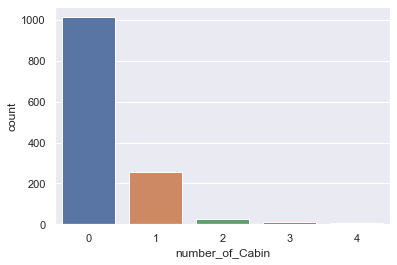

In [411]:
sns.countplot(log_bin_one_hot_df['number_of_Cabin'])

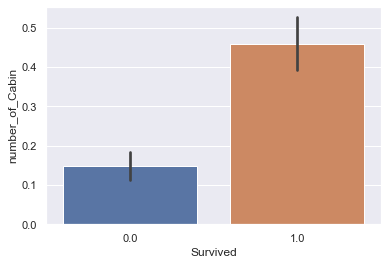

                     number_of_Cabin  log_number_of_Cabin  Survived
number_of_Cabin             1.000000             0.924291  0.277053
log_number_of_Cabin         0.924291             1.000000  0.314632
Survived                    0.277053             0.314632  1.000000


In [413]:
temp_df = pd.merge(log_bin_one_hot_df[['number_of_Cabin','log_number_of_Cabin']], y_true, left_index=True, right_index=True)
sns.barplot(x = 'Survived', y = 'number_of_Cabin', data = temp_df)
plt.show()
print(temp_df.corr())

### 5️⃣ Feature engineering 4
#### Feature Selection
가장 적합한 특성을 선택하는 방법

#### 1) Generation
- Binarization, Quantization
- Scaling (normalization)
- Interaction features
- Log transformation
- Dimension reduciton
- Clustering

#### 2) Selection
- Univariate feature selection
- Model-based selection
: 모델을 사용해서 Select
- Iterative feature selection
: 조금씩 줄여나가면서 가장 좋은 것을 Select
- Feature removal
: 필요없는 건 아예 지워버리는 거

#### 1. Feature selection
- 모든 feature들이 반드시 model 학습에 필요하지는 X
- 어떤 feature들은 성능을 오히려 나쁘게 한다
- 너무 많은 feature는 overfitting의 원인
- 모델에 따라서 필요한 feature를 선택
- 필요없는 feature 제거 -> 학습 속도와 성능 향상
- 다양한 기법과 코드에 대해 공부

#### * feature 선택의 주의 사항들
- prediction time에도 쓸 수 있는 feature인가
: 예측하는 시점에 데이터를 쓸 수 있는지 

- 실시간 예측 필요 시, 생성이 너무 고비용이 아닌가
- scale은 일정한가, Or 비율적으로 표현 가능한가
- 새롭게 등장하는 category data는? 가장 비슷한 것은 분류한다던지
- 너무 극단적인 분포 -> threshold 기반으로 binarization

#### * 이런 feature들은 삭제
- Correlation이 너무 높은 feature는 삭제
ex) A,B feature의 corr이 0,8이상이다 -> 둘 중 하나만 사용하던지

- 전처리가 완료된 str feature들
- ID와 같은 성향을 가진 feature들

### Model & Trainning
#### 1) 데이터의 정리가 끝나면 학습하는 방법
- 적합한 모델 선정(실험)
Ex) RFD, XG, Light, AutoML : 기본 모델들
- 모델에 적합한 하이퍼 패러미터 선정 (실험)
: 실험적으로 정함, test 후 가장 높은 것으로 선정?...
- 다양한 전처리 경우의 수 입력 (실험)
: 상황 마다의 성능을 본다
- 학습 실행
- 성능의 기준을 잡고 평가
: Accuracy, Pre, RMSE를 가지고 성능 측정

#### 2) 데이터 numpy로 변환
```
X_train = all_df[:number_of_train_dataset].values
X_test = all_df[:number_of_train_dataset:].values
y_train = y_true.copy()
```

#### 3) 모델을 선정하여 학습시키기
```
# 모델 : RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators = 100, max_depth = 20, random_state = 0)
clf.fit(X_train, y_train)
# fitting하여 예측

y_pre = clf.predict(X_test)
```

### Feature Elimination

In [ ]:
features = log_bin_one_hot_df.columns.tolist()
features

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex-Pclass',
 'Embarked-Pclass',
 'SexPclass_female1',
 'SexPclass_female2',
 'SexPclass_female3',
 'SexPclass_male1',
 'SexPclass_male2',
 'SexPclass_male3',
 'EmbarkedPclass_C1',
 'EmbarkedPclass_C2',
 'EmbarkedPclass_C3',
 'EmbarkedPclass_Q1',
 'EmbarkedPclass_Q2',
 'EmbarkedPclass_Q3',
 'EmbarkedPclass_S1',
 'EmbarkedPclass_S2',
 'EmbarkedPclass_S3',
 'EmbarkedPclass_nan1',
 'log_fare',
 'is_mr',
 'is_miss',
 'is_mrs',
 'is_pc']

In [414]:
features = log_bin_one_hot_df.columns.tolist()
print(features)

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex-Pclass', 'Embarked-Pclass', 'SexPclass_female1', 'SexPclass_female2', 'SexPclass_female3', 'SexPclass_male1', 'SexPclass_male2', 'SexPclass_male3', 'EmbarkedPclass_C1', 'EmbarkedPclass_C2', 'EmbarkedPclass_C3', 'EmbarkedPclass_Q1', 'EmbarkedPclass_Q2', 'EmbarkedPclass_Q3', 'EmbarkedPclass_S1', 'EmbarkedPclass_S2', 'EmbarkedPclass_S3', 'log_fare', 'is_mr', 'is_miss', 'is_mrs', 'is_pc', 'is_ca', 'is_paris', 'is_soton', 'is_ston', 'is_so', 'is_cabin_none', 'is_cabin_a', 'is_cabin_b', 'is_cabin_c', 'is_cabin_d', 'is_cabin_e', 'is_cabin_f', 'is_cabin_g', 'number_of_Cabin', 'log_number_of_Cabin']


In [416]:
all_df = log_bin_one_hot_df.copy(deep = True)

elimination_features = ['PassengerId', 'Name', 'Cabin', 'Ticket']
for col_name in elimination_features:
    all_df.drop(col_name, axis = 1, inplace = True)

In [419]:
del all_df['Sex']
del all_df['Pclass']
del all_df['Embarked']
del all_df['Sex-Pclass']
del all_df['Embarked-Pclass']

In [420]:
all_df

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,is_cabin_none,is_cabin_a,is_cabin_b,is_cabin_c,is_cabin_d,is_cabin_e,is_cabin_f,is_cabin_g,number_of_Cabin,log_number_of_Cabin
0,22.000000,1,0,7.2500,0,1,0,0,1,0,...,True,False,False,False,False,False,False,False,0,-4.60517
1,38.000000,1,0,71.2833,1,0,1,0,0,1,...,False,False,False,False,False,False,False,False,1,0.00995
2,26.000000,0,0,7.9250,1,0,0,0,1,0,...,True,False,False,False,False,False,False,False,0,-4.60517
3,35.000000,1,0,53.1000,1,0,1,0,0,0,...,False,False,False,False,False,False,False,False,1,0.00995
4,35.000000,0,0,8.0500,0,1,0,0,1,0,...,True,False,False,False,False,False,False,False,0,-4.60517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,24.816367,0,0,8.0500,0,1,0,0,1,0,...,True,False,False,False,False,False,False,False,0,-4.60517
1305,39.000000,0,0,108.9000,1,0,1,0,0,1,...,False,False,False,False,False,False,False,False,1,0.00995
1306,38.500000,0,0,7.2500,0,1,0,0,1,0,...,True,False,False,False,False,False,False,False,0,-4.60517
1307,24.816367,0,0,8.0500,0,1,0,0,1,0,...,True,False,False,False,False,False,False,False,0,-4.60517


In [421]:
number_of_test_dataset

418

In [422]:
X_train = all_df[:number_of_train_dataset].values
X_test = all_df[number_of_test_dataset:].values
y_train = y_true.copy()

In [423]:
X_train.shape

(891, 47)

In [424]:
from sklearn.feature_selection import RFE
# RFE : RandomForest와 같은 모델을 사용해서 필요없는 feature 알아서 없애줌
from sklearn.ensemble import RandomForestClassifier
# ANOVA 같은 통계적 분석에서 사용하는 기능을 이용해서 
from sklearn.feature_selection import SelectFromModel

select = RFE(RandomForestClassifier(n_estimators = 100))
# select = SelectFromModel(estimator = RandomForestRegressor(n_estimators = 200), threshold)

select.fit(X_train, y_train)

# trainsform training set
# 기존의 feature에서 feature 줄임
X_train_selected = select.transform(X_train)
X_train_selected.shape

(891, 23)

- 살아남은 feature와 죽은 feature알 수 있음

In [426]:
select.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True])

In [428]:
# 살아남은 feature 이름
all_df.columns[select.get_support()]

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_3',
       'Embarked_C', 'Embarked_S', 'SexPclass_female1', 'SexPclass_female2',
       'SexPclass_female3', 'SexPclass_male2', 'SexPclass_male3',
       'EmbarkedPclass_S3', 'log_fare', 'is_mr', 'is_miss', 'is_mrs', 'is_so',
       'is_cabin_none', 'number_of_Cabin', 'log_number_of_Cabin'],
      dtype='object')

In [430]:
# 모델
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100, max_depth=20, random_state=0)

clf.fit(X_train, y_train)

idx = (all_df[number_of_train_dataset:].index+1).tolist()
y_pre = clf.predict(X_test)
y_pre

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [431]:
# feature가 제거된 후 X_train_selected 값으로 fitting
clf.fit(X_train_selected, y_train)
# feature가 제거된 후 X_test 값으로 prediction
idx = (all_df[number_of_train_dataset:].index+1).tolist()
# 만약 select 예측하고 싶을 시
y_pred_elim = clf.predict(select.transform(X_test))
y_pred_elim

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1.

- Kaggle 제출 코드

In [432]:
# submission_columns = ["PassengerId", "Survived"]

# # feature 제거 전
# submission_df = pd.DataFrame([idx, y_pred]).T
# submission_df.columns = submission_columns
# for col_name in submission_columns:
#     submission_df[col_name] = submission_df[col_name].astype(int)
# submission_df.to_csv("submission_all.csv", index = False)

# # feature 제거 후
# submission_df = pd.DataFrame([idx, y_pred_elim]).T
# submission_df.columns = submission_columns
# for col_name in submission_columns:
#     submission_df[col_name] = submission_df[col_name].astype(int)
# submission_df.to_csv("submission_elim.csv", index = False)